In [379]:
# Veri Setini Yükleme ve İnceleme
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

data.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [381]:
# veri içerisinde bulunan sütunları listeyelim.
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [382]:
# drop metodu ile id ve oyunlar'ı çıkaralım
data = data.drop(["target"], axis = 1) # axis = 1 sütunları çıkart demek
data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [383]:
data = data[data['alcohol'] <= 14]

data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
4     13.24        2.59  2.87               21.0      118.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
12    13.75        1.73  2.41               16.0       89.0           2.60   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
4         2.69                  0.39             1.82             4.32  1.04   
9         3.15                  0.22             1.85             7.22  1.01   
12        2.76                  0.29             1.81             5.60  1.15   

    od280/od315_of_diluted_wines  proline  
1                           3.40   1050.0  
2                           3.17   1185.0  
4                           2.93    735.0  
9                           3.55   1045.0  
12                          2.90   1320.0

'alcohol' değeri 14'ten küçük veya eşit olan satırları filtrele

In [384]:
# öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.
def plotHistogram(value):
    """
        Girdi: Değişken/sütun ismi
        Çıktı: Histogram grafiği
    """
    
    plt.figure()
    plt.hist(data[value], bins = 85, color = "orange")
    plt.xlabel(value)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(value))
    plt.show()

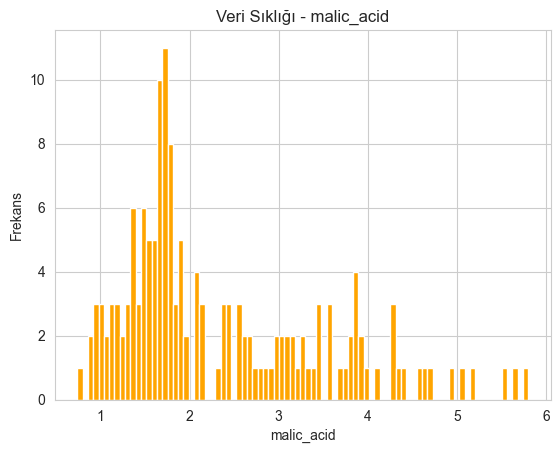

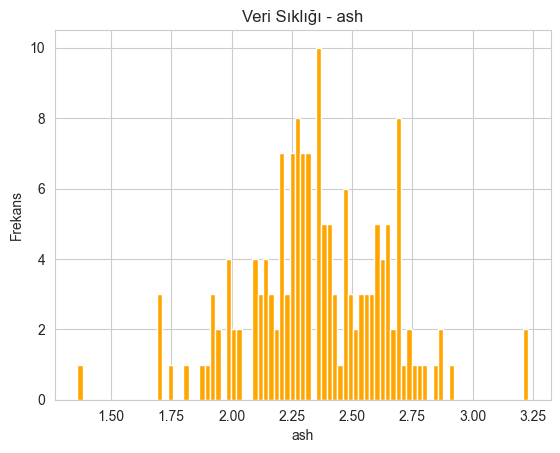

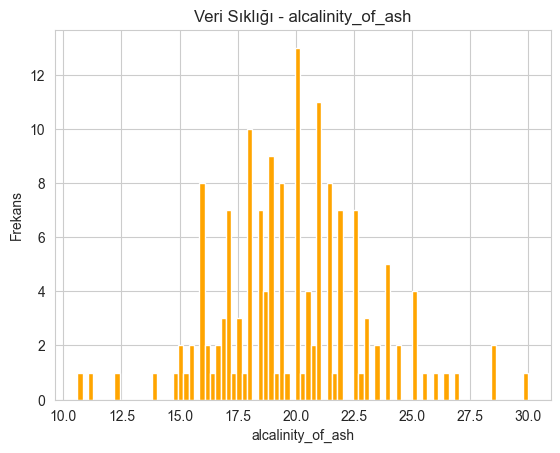

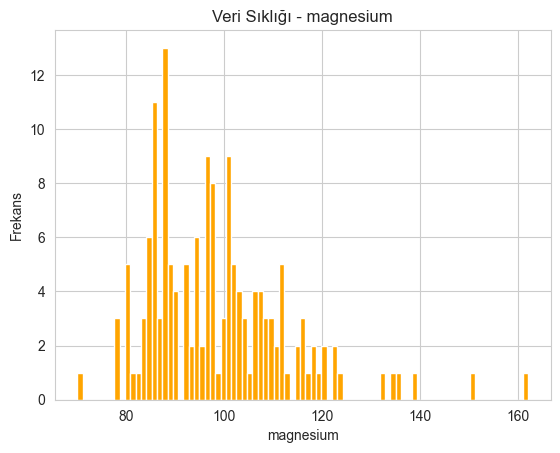

In [385]:
# sayısal değişkenler için histogram çizdirelim
sayisal_degisken = ["malic_acid", "ash", "alcalinity_of_ash", "magnesium"]
for i in sayisal_degisken:
    plotHistogram(i)

Veri setindeki sayısal değişkenler için histogramlar çizer. 
Histogramlar, verilerin nasıl dağıldığını gösteren grafiklerdir. 

In [386]:
# veri içerisinde bulunan sayısal değerleri istatistiksel açıdan inceleyelim
data.describe() 

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  156.000000  156.000000  156.000000         156.000000  156.000000   
mean    12.822756    2.353205    2.357051          19.851923   98.705128   
std      0.699512    1.149891    0.286181           3.184812   14.304169   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.290000    1.530000    2.200000          18.000000   88.000000   
50%     12.850000    1.845000    2.350000          19.800000   97.000000   
75%     13.457500    3.132500    2.565000          21.525000  106.000000   
max     13.940000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     156.000000  156.000000            156.000000       156.000000   
mean        2.216859    1.923462              0.368077         1.530000   
std         0.606110    0.972757              0.127234         0.559121   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.695000    1.072500              0.270000         1.140000   
50%         2.200000    2.005000              0.360000         1.460000   
75%         2.642500    2.690000              0.455000         1.862500   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       156.000000  156.000000                    156.000000   156.000000  
mean          4.846346    0.951321                      2.554679   693.878205  
std           2.281781    0.232573                      0.703775   277.993347  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.037500    0.767500                      1.827500   486.000000  
50%           4.370000    0.960000                      2.760000   630.000000  
75%           6.000000    1.120000                      3.132500   847.500000  
max          11.750000    1.710000                      4.000000  1515.000000

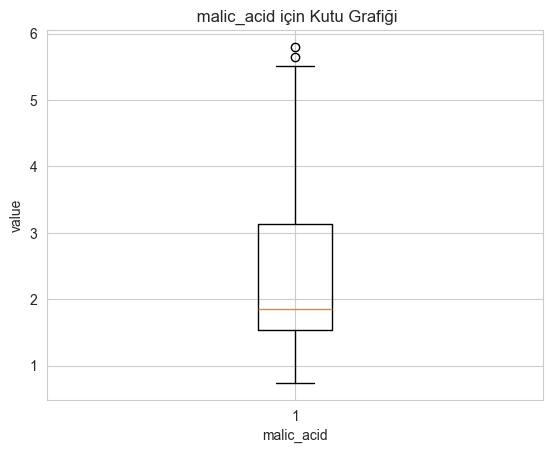

In [387]:
plt.boxplot(data.malic_acid)
plt.title(" malic_acid için Kutu Grafiği")
plt.xlabel("malic_acid")
plt.ylabel("value")
plt.show()

Kutu grafiği, verilerin yayılımını ve merkezi eğilimini gösterir, ayrıca aykırı değerleri de belirtir.

In [388]:
# öncelikli olarak bar grafiğini elde edeceğimiz metodumuzu yazalım.
def plotBar(value,n = 5):
    """
        Girdi: Değişken/sütun ismi
               n = en önemli 10 eşsiz değer
        Çıktı: Bar grafiği
    """
    veri_ = data[value]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(value))
    plt.show()
    print("{}: \n {}".format(value, veri_sayma))

In [389]:
# sayisal veriler arasında ilişki incelemesi
data.loc[:,["alcohol","malic_acid","magnesium"]].corr() # korelasyon tablosu

alcohol  malic_acid  magnesium
alcohol     1.000000    0.155897   0.218926
malic_acid  0.155897    1.000000  -0.057911
magnesium   0.218926   -0.057911   1.000000

Veri setindeki kalite derecelendirmelerine göre alkol içeriğinin nasıl bir ilişkisi olduğunu gösterir.

In [390]:
veri_zaman = data.copy() # verinin orjinali bozulmasın diye kopyalayalım
veri_zaman.head(3)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
1                          3.40   1050.0  
2                          3.17   1185.0  
4                          2.93    735.0

In [391]:
essiz_malic_acid = veri_zaman.malic_acid.unique()
essiz_malic_acid

array([1.78, 2.36, 2.59, 1.35, 1.73, 1.81, 1.57, 3.1 , 3.8 , 1.86, 1.6 ,
       2.05, 1.77, 1.72, 1.9 , 1.5 , 1.66, 1.83, 1.53, 1.8 , 1.64, 1.65,
       1.71, 3.84, 1.89, 3.98, 1.68, 1.75, 1.67, 1.97, 1.43, 0.94, 1.1 ,
       1.36, 1.25, 1.13, 1.45, 1.21, 1.01, 1.17, 1.19, 1.61, 1.51, 1.09,
       1.88, 0.9 , 2.89, 0.99, 3.87, 0.92, 3.86, 0.89, 0.98, 2.06, 1.33,
       2.83, 1.99, 1.52, 2.12, 1.41, 1.07, 3.17, 2.08, 1.34, 2.45, 2.55,
       1.29, 3.74, 2.43, 2.68, 0.74, 1.39, 1.47, 3.43, 2.4 , 4.43, 5.8 ,
       4.31, 2.16, 2.13, 1.63, 4.3 , 2.99, 2.31, 3.55, 1.24, 2.46, 4.72,
       5.51, 3.59, 2.96, 2.81, 2.56, 4.95, 3.88, 3.57, 5.04, 4.61, 3.24,
       3.9 , 3.12, 2.67, 3.3 , 5.19, 4.12, 3.03, 3.83, 3.26, 3.27, 3.45,
       2.76, 4.36, 3.7 , 3.37, 2.58, 4.6 , 2.39, 5.65, 3.91, 4.28])

Veri’ adlı bir DataFrame’deki ‘zaman_malzeme_acid’ sütunundaki tüm benzersiz değerleri bulur ve bunları ‘esşiz_malzeme_acid’ adlı bir değişkene atar.

In [392]:
dizili_array = np.sort(veri_zaman.malic_acid.unique())
dizili_array

array([0.74, 0.89, 0.9 , 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1 ,
       1.13, 1.17, 1.19, 1.21, 1.24, 1.25, 1.29, 1.33, 1.34, 1.35, 1.36,
       1.39, 1.41, 1.43, 1.45, 1.47, 1.5 , 1.51, 1.52, 1.53, 1.57, 1.6 ,
       1.61, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.71, 1.72, 1.73, 1.75,
       1.77, 1.78, 1.8 , 1.81, 1.83, 1.86, 1.88, 1.89, 1.9 , 1.97, 1.99,
       2.05, 2.06, 2.08, 2.12, 2.13, 2.16, 2.31, 2.36, 2.39, 2.4 , 2.43,
       2.45, 2.46, 2.55, 2.56, 2.58, 2.59, 2.67, 2.68, 2.76, 2.81, 2.83,
       2.89, 2.96, 2.99, 3.03, 3.1 , 3.12, 3.17, 3.24, 3.26, 3.27, 3.3 ,
       3.37, 3.43, 3.45, 3.55, 3.57, 3.59, 3.7 , 3.74, 3.8 , 3.83, 3.84,
       3.86, 3.87, 3.88, 3.9 , 3.91, 3.98, 4.12, 4.28, 4.3 , 4.31, 4.36,
       4.43, 4.6 , 4.61, 4.72, 4.95, 5.04, 5.19, 5.51, 5.65, 5.8 ])

bir sütundaki tüm farklı değerleri bulup bunları bir sıraya koyar.

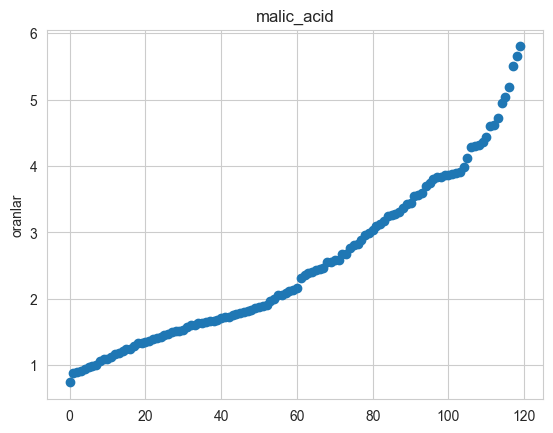

In [393]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("oranlar")
plt.title("malic_acid")
plt.show()

bir veri dizisinin dağılımını bir nokta grafiği olarak gösterir. Grafik üzerinde bir ızgara, y ekseninde "oranlar" etiketi ve "malic_acid" başlığı bulunur.

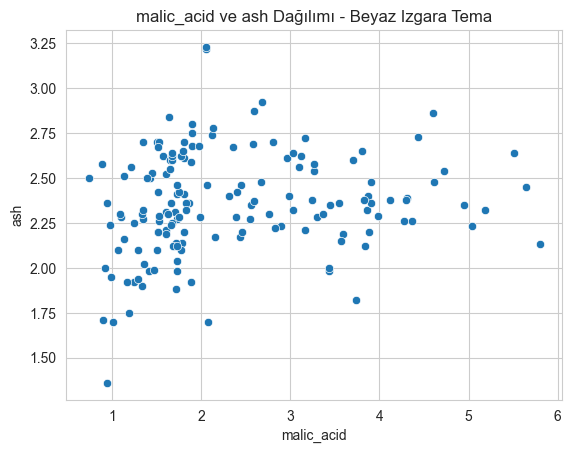

In [394]:
# Saçılım grafiği çizmek için bir plot yapalım
def sacilimGrafik():
    sns.scatterplot(x='malic_acid', y='ash', data=data)
    plt.title('malic_acid ve ash Dağılımı - Beyaz Izgara Tema')
    plt.show()
sacilimGrafik()    

data adlı veri kümesindeki malic_acid ve ash sütunlarının dağılımını bir nokta grafiği ile gösterir.

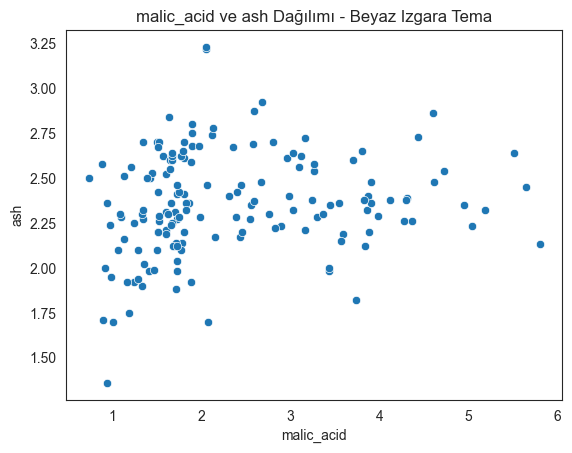

In [395]:
# seaborn stilleri
sns.set_style("white")
sacilimGrafik()

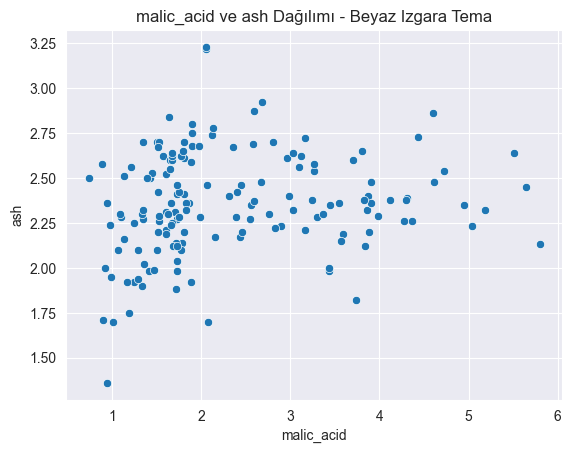

In [396]:
# seaborn stilleri
sns.set_style("darkgrid")
sacilimGrafik()

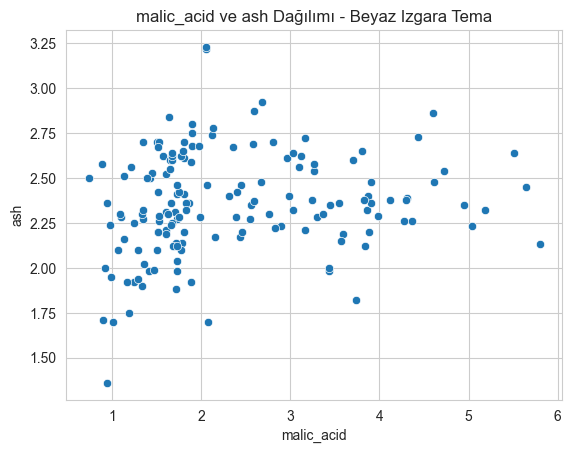

In [397]:
# seaborn stilleri ve dağılım gradiği 
# son olarak beyaz ızgara teması ile devam edelim
sns.set_style("whitegrid")
sacilimGrafik()

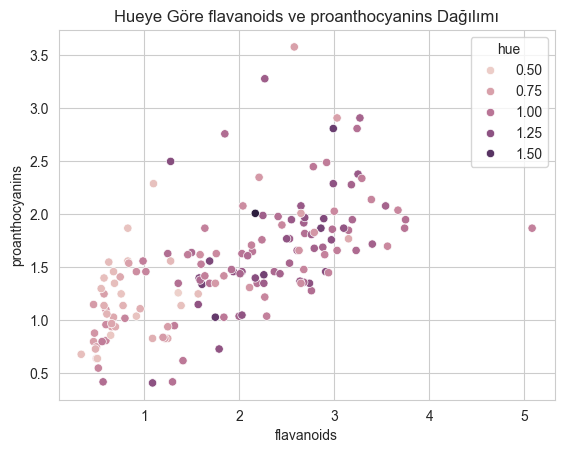

In [398]:
# hue = sınıf ya da etiket olarak adlandırılabilir.
# scatter plot çizdirilirken hue'ye göre sınıflar farklı renklendirili
sns.scatterplot(x='flavanoids', y='proanthocyanins', hue='hue', data=data)
plt.title('Hueye Göre flavanoids ve proanthocyanins Dağılımı')
plt.show()

data veri kümesindeki flavanoids ve proanthocyanins sütunlarının dağılımını, hue sütunundaki değerlere göre renklendirerek bir nokta grafiği ile gösterir. 

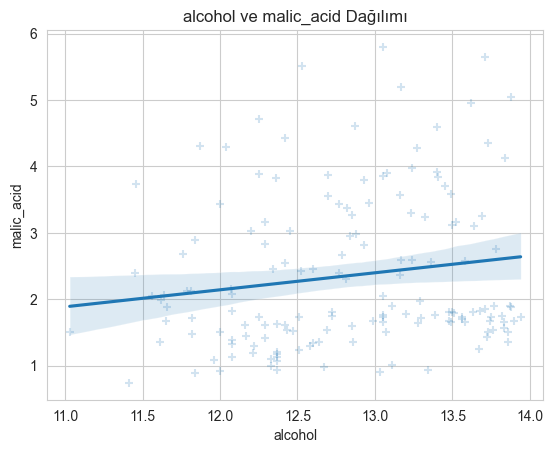

In [399]:
# saçılım grafiği yapılır üzerine doğrusal regresyon yöntemi ile line fit işlemi gerçekleştirilir
# doğrusal regresyon makine öğrenmesinde anlatılacaktır.
sns.regplot(x='alcohol', y='malic_acid', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('alcohol ve malic_acid Dağılımı')
plt.show()

data veri kümesindeki alcohol ve malic_acid sütunlarının dağılımını ve aralarındaki doğrusal ilişkiyi bir regresyon çizgisiyle gösterir.

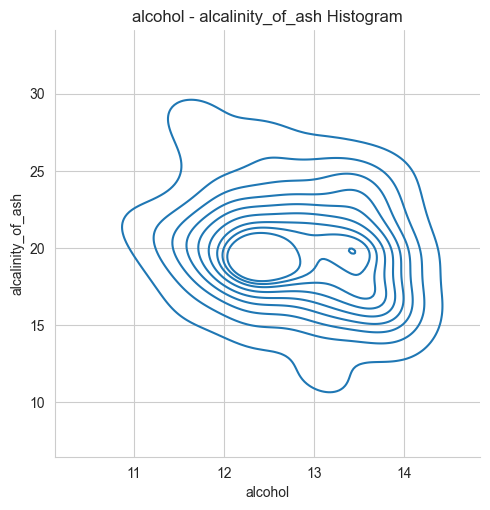

In [400]:
sns.displot(data, x="alcohol", y="alcalinity_of_ash", kind="kde")
plt.xlabel("alcohol")
plt.ylabel("alcalinity_of_ash")
plt.title("alcohol - alcalinity_of_ash Histogram")
plt.show()

data veri kümesindeki alcohol ve alcalinity_of_ash sütunlarının iki boyutlu yoğunluk dağılımını (KDE) gösteren bir histogram oluşturur.

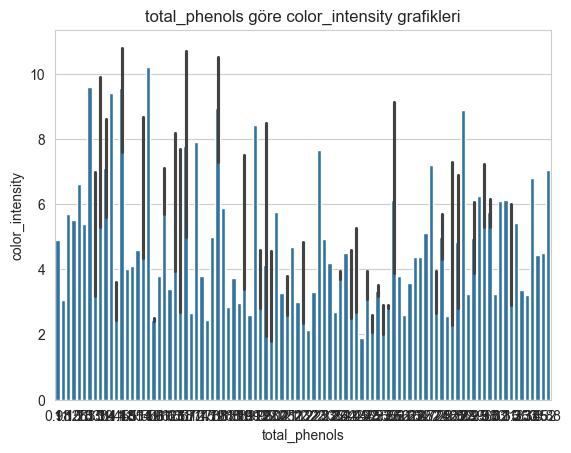

In [401]:
sns.barplot(x="total_phenols", y="color_intensity", data=data)
plt.title("total_phenols göre color_intensity grafikleri")
plt.show()

data veri kümesindeki total_phenols ve color_intensity sütunlarını kullanarak bir çubuk grafiği oluşturur.

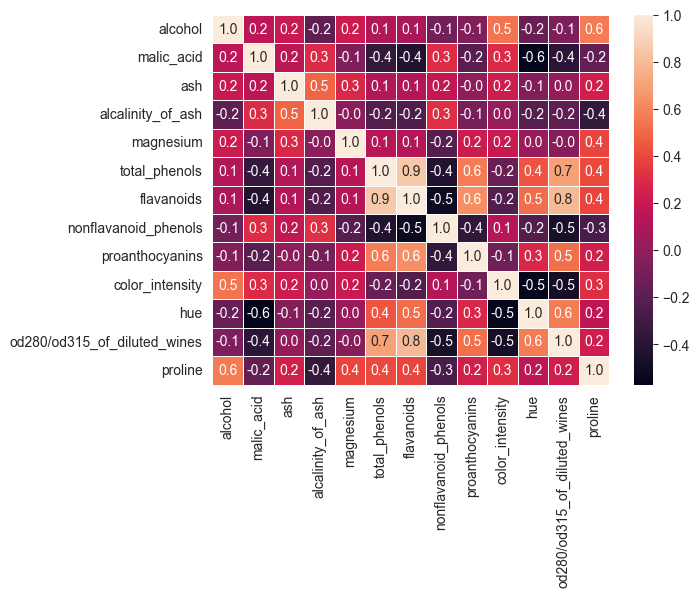

In [402]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

data veri kümesindeki sütunlar arasındaki korelasyonları gösteren bir heatmap (ısı haritası) oluşturur.

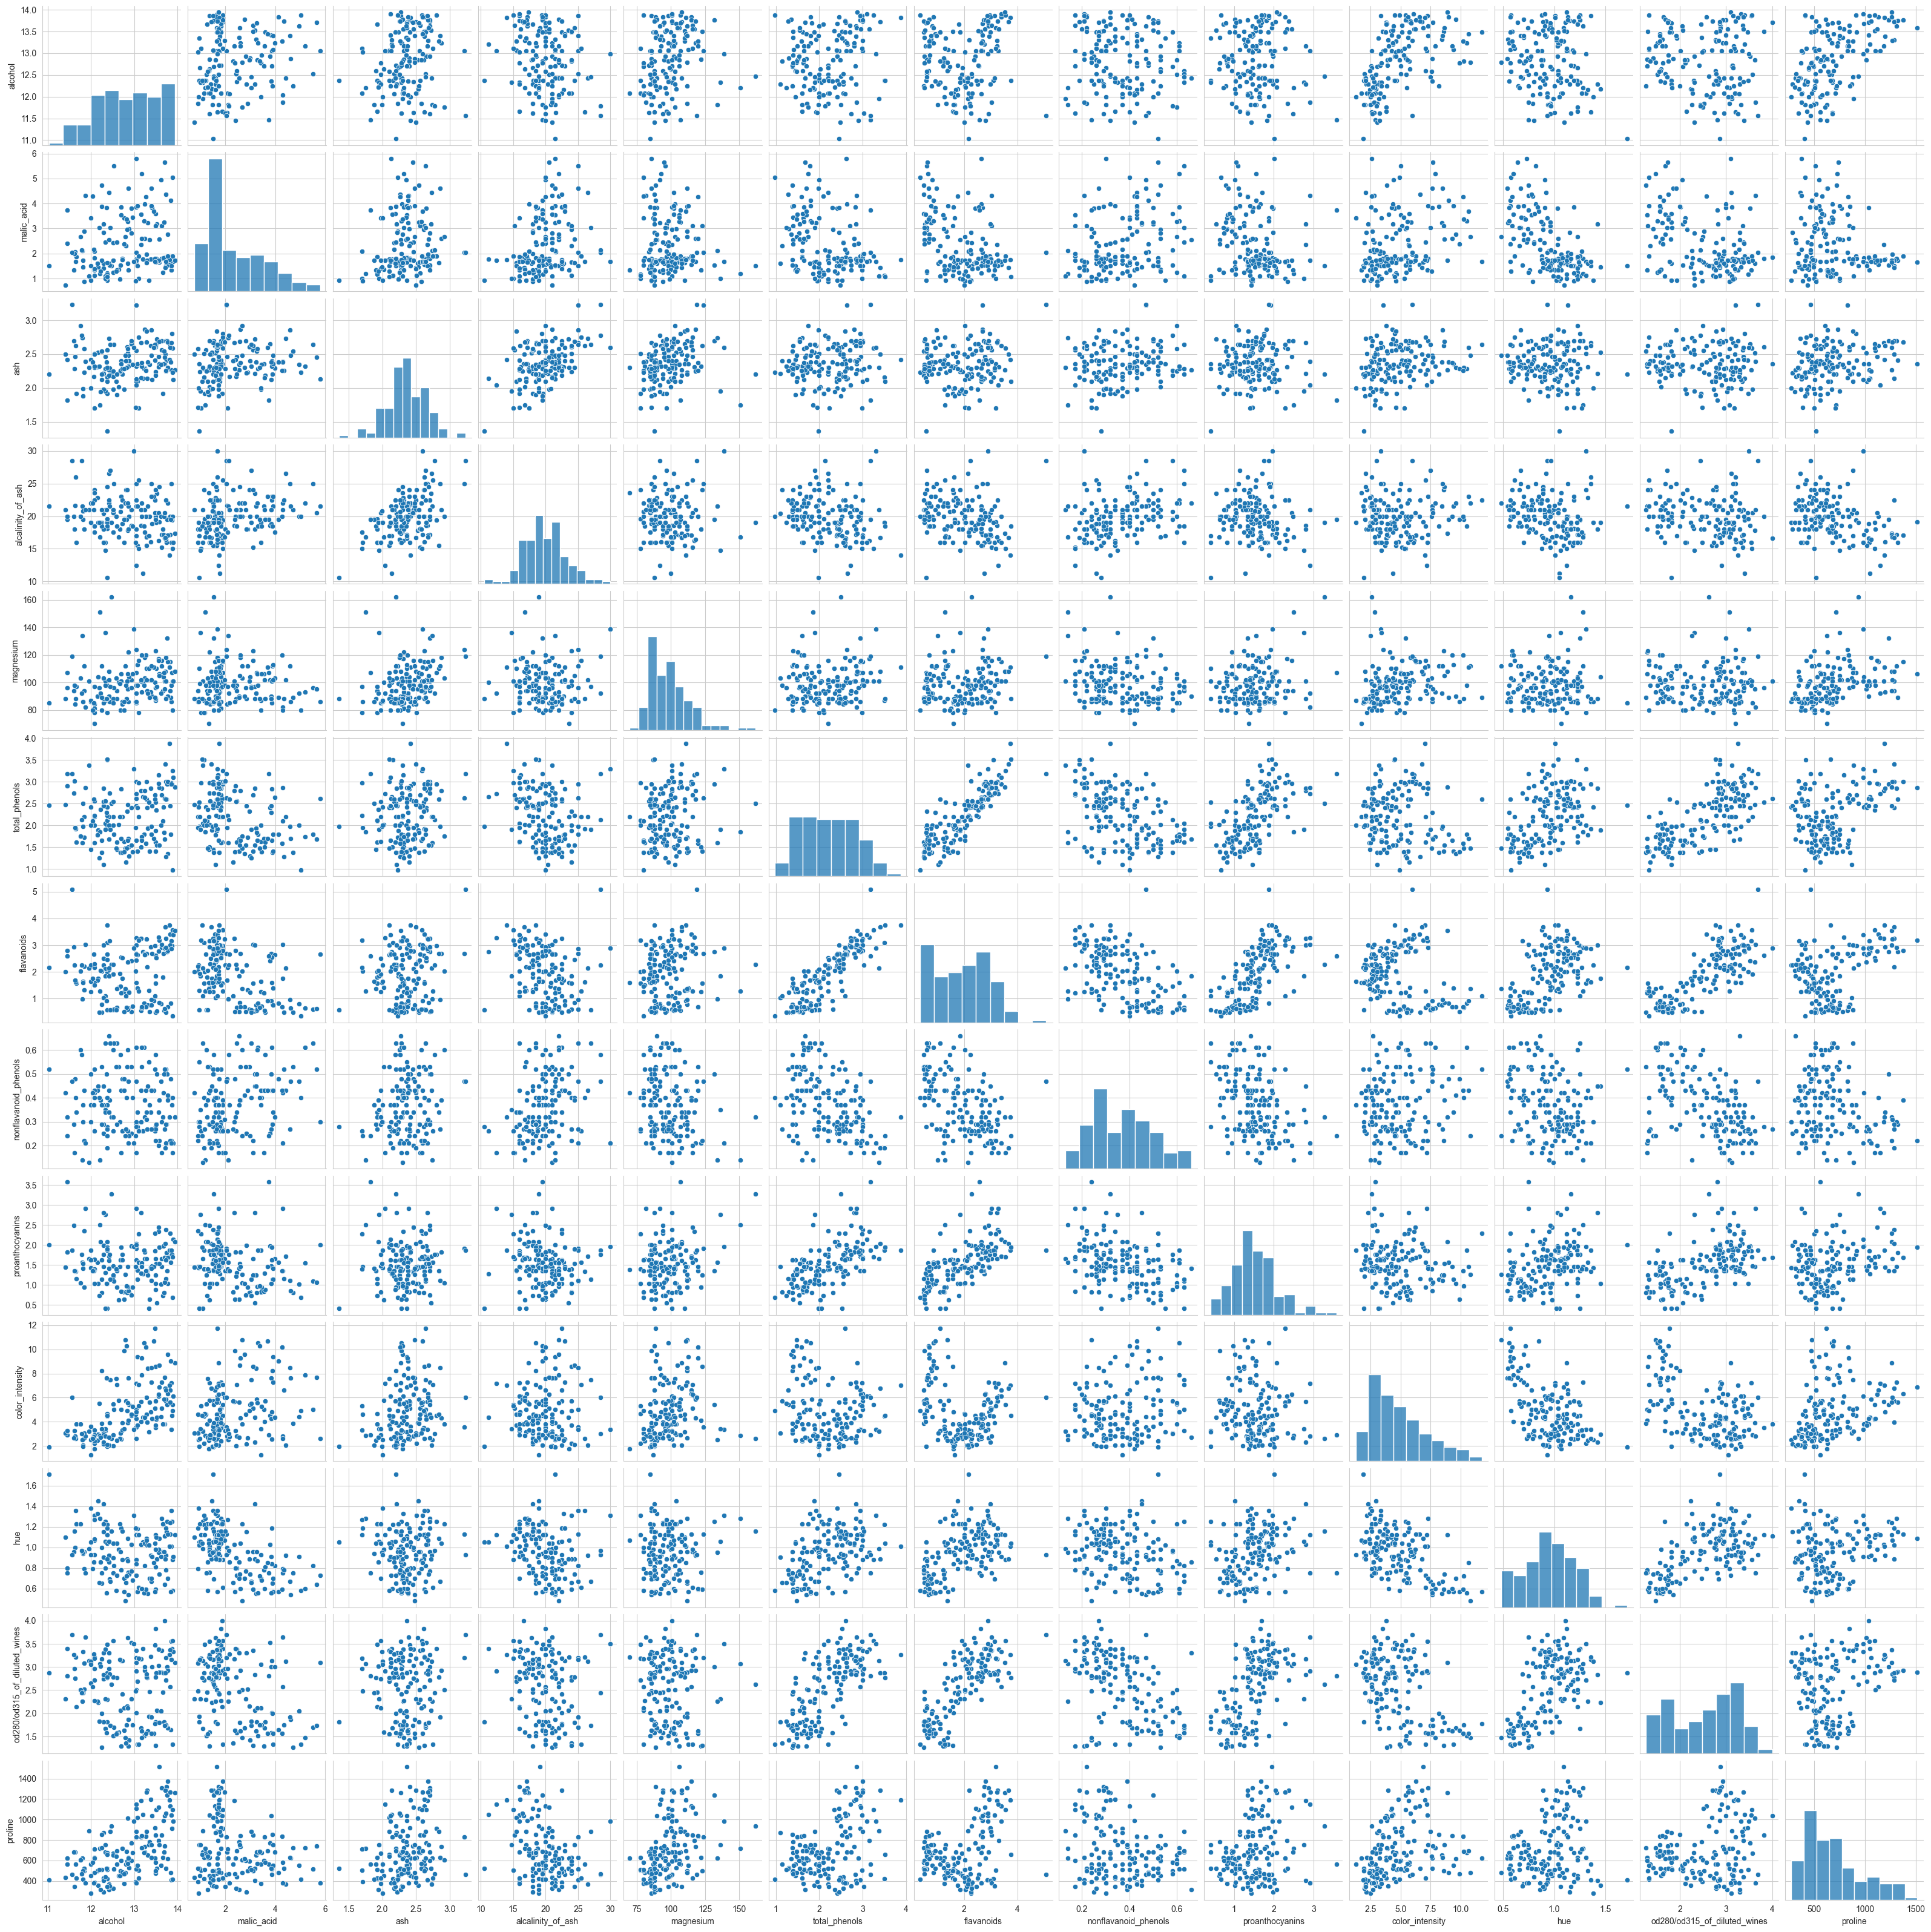

In [403]:
sns.pairplot(data)
plt.show()

data veri kümesindeki tüm sayısal sütunlar arasındaki ilişkileri gösteren bir çift-çift grafik oluşturur.

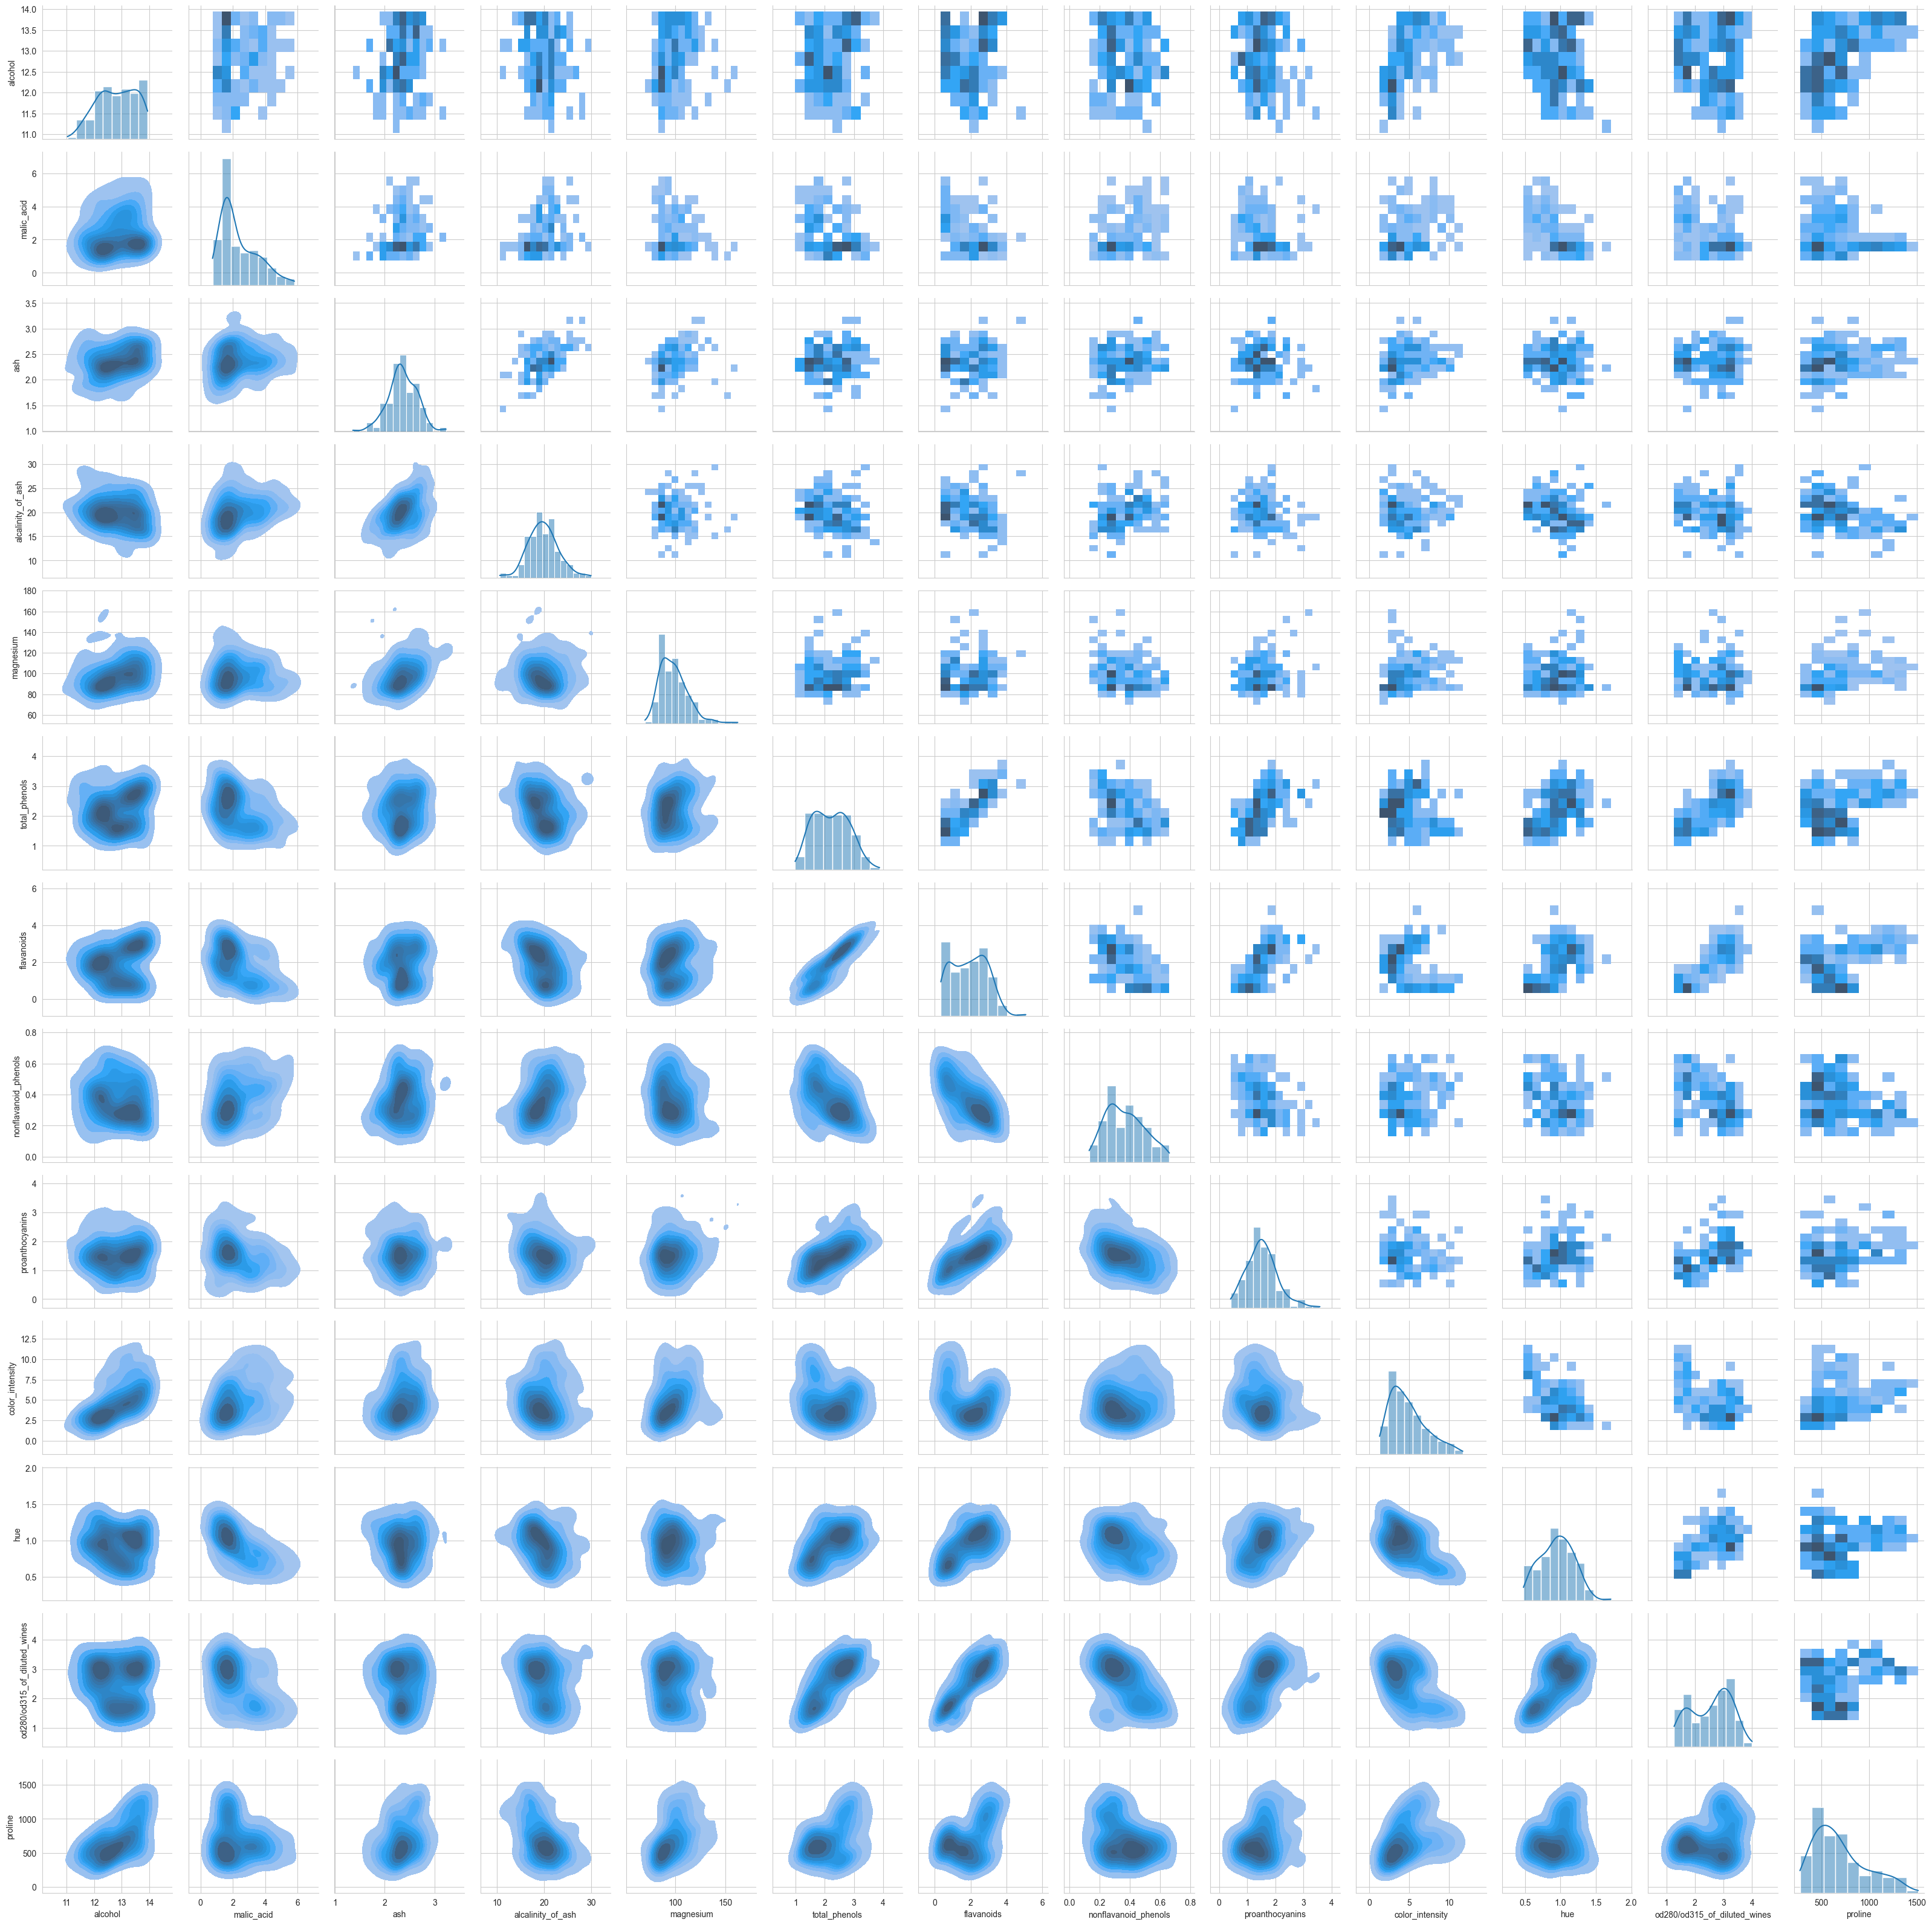

In [404]:
g = sns.PairGrid(data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

data veri kümesindeki tüm sayısal sütunlar arasındaki ilişkileri gösteren bir çift-çift grafik oluşturur, ancak PairGrid kullanarak daha özelleştirilebilir bir yaklaşım benimser.

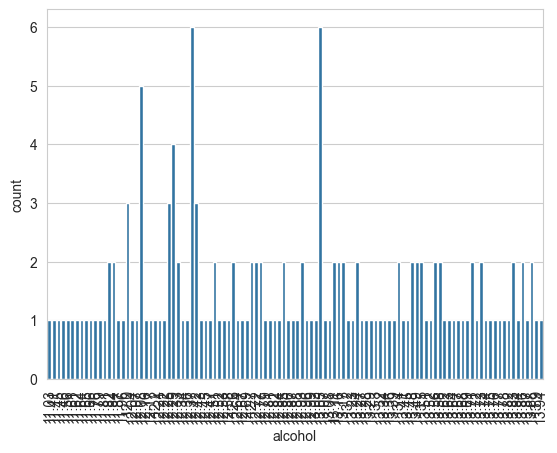

In [405]:
sns.countplot(x="alcohol", data=data)
plt.xticks(rotation = 90)
plt.show()

data veri kümesindeki alcohol sütunundaki değerlerin sayısını gösteren bir sayaç grafiği oluşturur.

In [406]:
# Veri Setini Yükleme ve İnceleme
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [407]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

veri setindeki tüm özellik isimlerini bir liste olarak döndürecektir.

In [408]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Bu sınıf isimleri, veri setinde bulunan üç farklı şarap türünü temsil eder.

In [409]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

 şarap veri setindeki kimyasal özellikleri içeren bir tablo (DataFrame) oluşturur 

In [410]:
df['target'] = wine.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

 şarap veri setindeki sınıf etiketlerini DataFrame'e yeni bir sütun olarak ekler.

In [411]:
data[data.target==0].head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

hedef değeri 0 olan şarap örneklerinden ilk 5 tanesini görüntüler

In [412]:
data[data.target==1].head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
59    12.37        0.94  1.36               10.6       88.0           1.98   
60    12.33        1.10  2.28               16.0      101.0           2.05   
61    12.64        1.36  2.02               16.8      100.0           2.02   
62    13.67        1.25  1.92               18.0       94.0           2.10   
63    12.37        1.13  2.16               19.0       87.0           3.50   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
59        0.57                  0.28             0.42             1.95  1.05   
60        1.09                  0.63             0.41             3.27  1.25   
61        1.41                  0.53             0.62             5.75  0.98   
62        1.79                  0.32             0.73             3.80  1.23   
63        3.10                  0.19             1.87             4.45  1.22   

    od280/od315_of_diluted_wines  proline  target  
59                          1.82    520.0       1  
60                          1.67    680.0       1  
61                          1.59    450.0       1  
62                          2.46    630.0       1  
63                          2.87    420.0       1

In [413]:
data[data.target==2].head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
130    12.86        1.35  2.32               18.0      122.0           1.51   
131    12.88        2.99  2.40               20.0      104.0           1.30   
132    12.81        2.31  2.40               24.0       98.0           1.15   
133    12.70        3.55  2.36               21.5      106.0           1.70   
134    12.51        1.24  2.25               17.5       85.0           2.00   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
130        1.25                  0.21             0.94             4.10  0.76   
131        1.22                  0.24             0.83             5.40  0.74   
132        1.09                  0.27             0.83             5.70  0.66   
133        1.20                  0.17             0.84             5.00  0.78   
134        0.58                  0.60             1.25             5.45  0.75   

     od280/od315_of_diluted_wines  proline  target  
130                          1.29    630.0       2  
131                          1.42    530.0       2  
132                          1.36    560.0       2  
133                          1.29    600.0       2  
134                          1.51    650.0       2

In [414]:
data['wine_name'] =data.target.apply(lambda x: wine.target_names[x])
data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target wine_name  
0                          3.92   1065.0       0   class_0  
1                          3.40   1050.0       0   class_0  
2                          3.17   1185.0       0   class_0  
3                          3.45   1480.0       0   class_0  
4                          2.93    735.0       0   class_0

her şarap örneğinin sayısal hedef değerini şarap sınıfının ismine dönüştürerek yeni bir sütun olarak ekler.

In [415]:
data[45:150]

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
45     14.21        4.04  2.44               18.9      111.0           2.85   
46     14.38        3.59  2.28               16.0      102.0           3.25   
47     13.90        1.68  2.12               16.0      101.0           3.10   
48     14.10        2.02  2.40               18.8      103.0           2.75   
49     13.94        1.73  2.27               17.4      108.0           2.88   
..       ...         ...   ...                ...        ...            ...   
145    13.16        3.57  2.15               21.0      102.0           1.50   
146    13.88        5.04  2.23               20.0       80.0           0.98   
147    12.87        4.61  2.48               21.5       86.0           1.70   
148    13.32        3.24  2.38               21.5       92.0           1.93   
149    13.08        3.90  2.36               21.5      113.0           1.41   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
45         2.65                  0.30             1.25             5.24  0.87   
46         3.17                  0.27             2.19             4.90  1.04   
47         3.39                  0.21             2.14             6.10  0.91   
48         2.92                  0.32             2.38             6.20  1.07   
49         3.54                  0.32             2.08             8.90  1.12   
..          ...                   ...              ...              ...   ...   
145        0.55                  0.43             1.30             4.00  0.60   
146        0.34                  0.40             0.68             4.90  0.58   
147        0.65                  0.47             0.86             7.65  0.54   
148        0.76                  0.45             1.25             8.42  0.55   
149        1.39                  0.34             1.14             9.40  0.57   

     od280/od315_of_diluted_wines  proline  target wine_name  
45                           3.33   1080.0       0   class_0  
46                           3.44   1065.0       0   class_0  
47                           3.33    985.0       0   class_0  
48                           2.75   1060.0       0   class_0  
49                           3.10   1260.0       0   class_0  
..                            ...      ...     ...       ...  
145                          1.68    830.0       2   class_2  
146                          1.33    415.0       2   class_2  
147                          1.86    625.0       2   class_2  
148                          1.62    650.0       2   class_2  
149                          1.33    550.0       2   class_2  

[105 rows x 15 columns]

In [416]:
df0 = df[:59]
df1 = df[59:130]
df2 = df[130:]

In [417]:
import matplotlib.pyplot as plt
%matplotlib inline

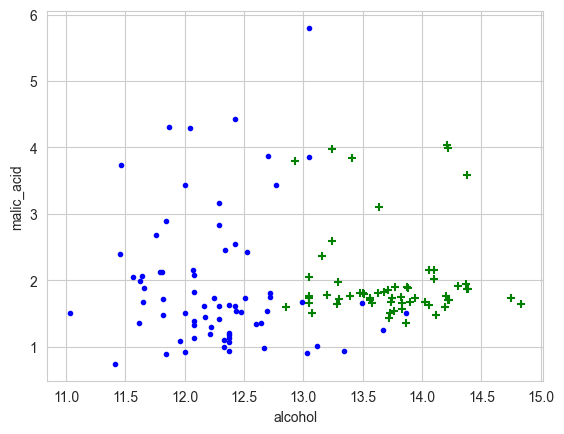

In [418]:
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.scatter(df0['alcohol'], df0['malic_acid'],color="green",marker='+')
plt.scatter(df1['alcohol'], df1['malic_acid'],color="blue",marker='.')

veri setindeki iki alt grubun (df0 ve df1) "alcohol" ve "malic_acid" özelliklerini görselleştirmek için kullanılır.

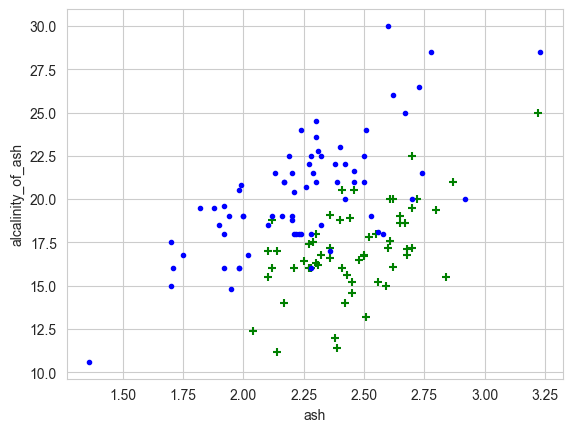

In [419]:
plt.xlabel('ash')
plt.ylabel('alcalinity_of_ash')
plt.scatter(df0['ash'], df0['alcalinity_of_ash'],color="green",marker='+')
plt.scatter(df1['ash'], df1['alcalinity_of_ash'],color="blue",marker='.')

ash ve alcalinity_of_ash özelliklerinin df0 ve df1 alt grupları arasındaki ilişkisini görselleştirmek için kullanılır.

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
X = data.drop(['target','wine_name'], axis='columns')
y = data.target

makine öğrenimi modellerini eğitmek için kullanılan veri setini bağımsız değişkenler (X) ve bağımlı değişken (y) olarak hazırlar.

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train ve y_train eğitim için kullanılırken, X_test ve y_test test etmek için kullanılır.

In [423]:
len(X_train)

142

eğitim setindeki örneklerin sayısını belirtir.

In [424]:
len(X_test)

36

test setindeki örneklerin sayısını belirtir.

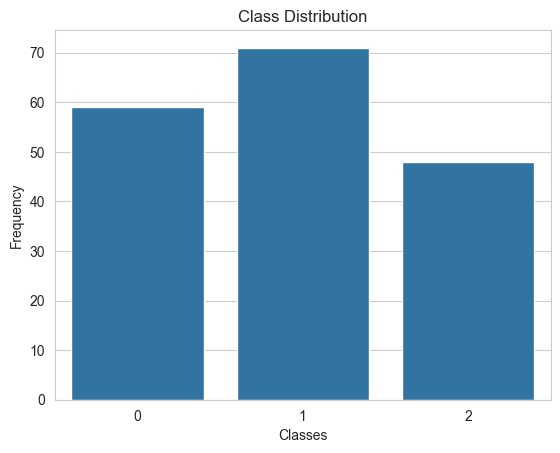

In [425]:
# Sınıf Dağılımı
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['target'])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


veri setindeki sınıf etiketlerinin dağılımını görselleştirmek için kullanılır.

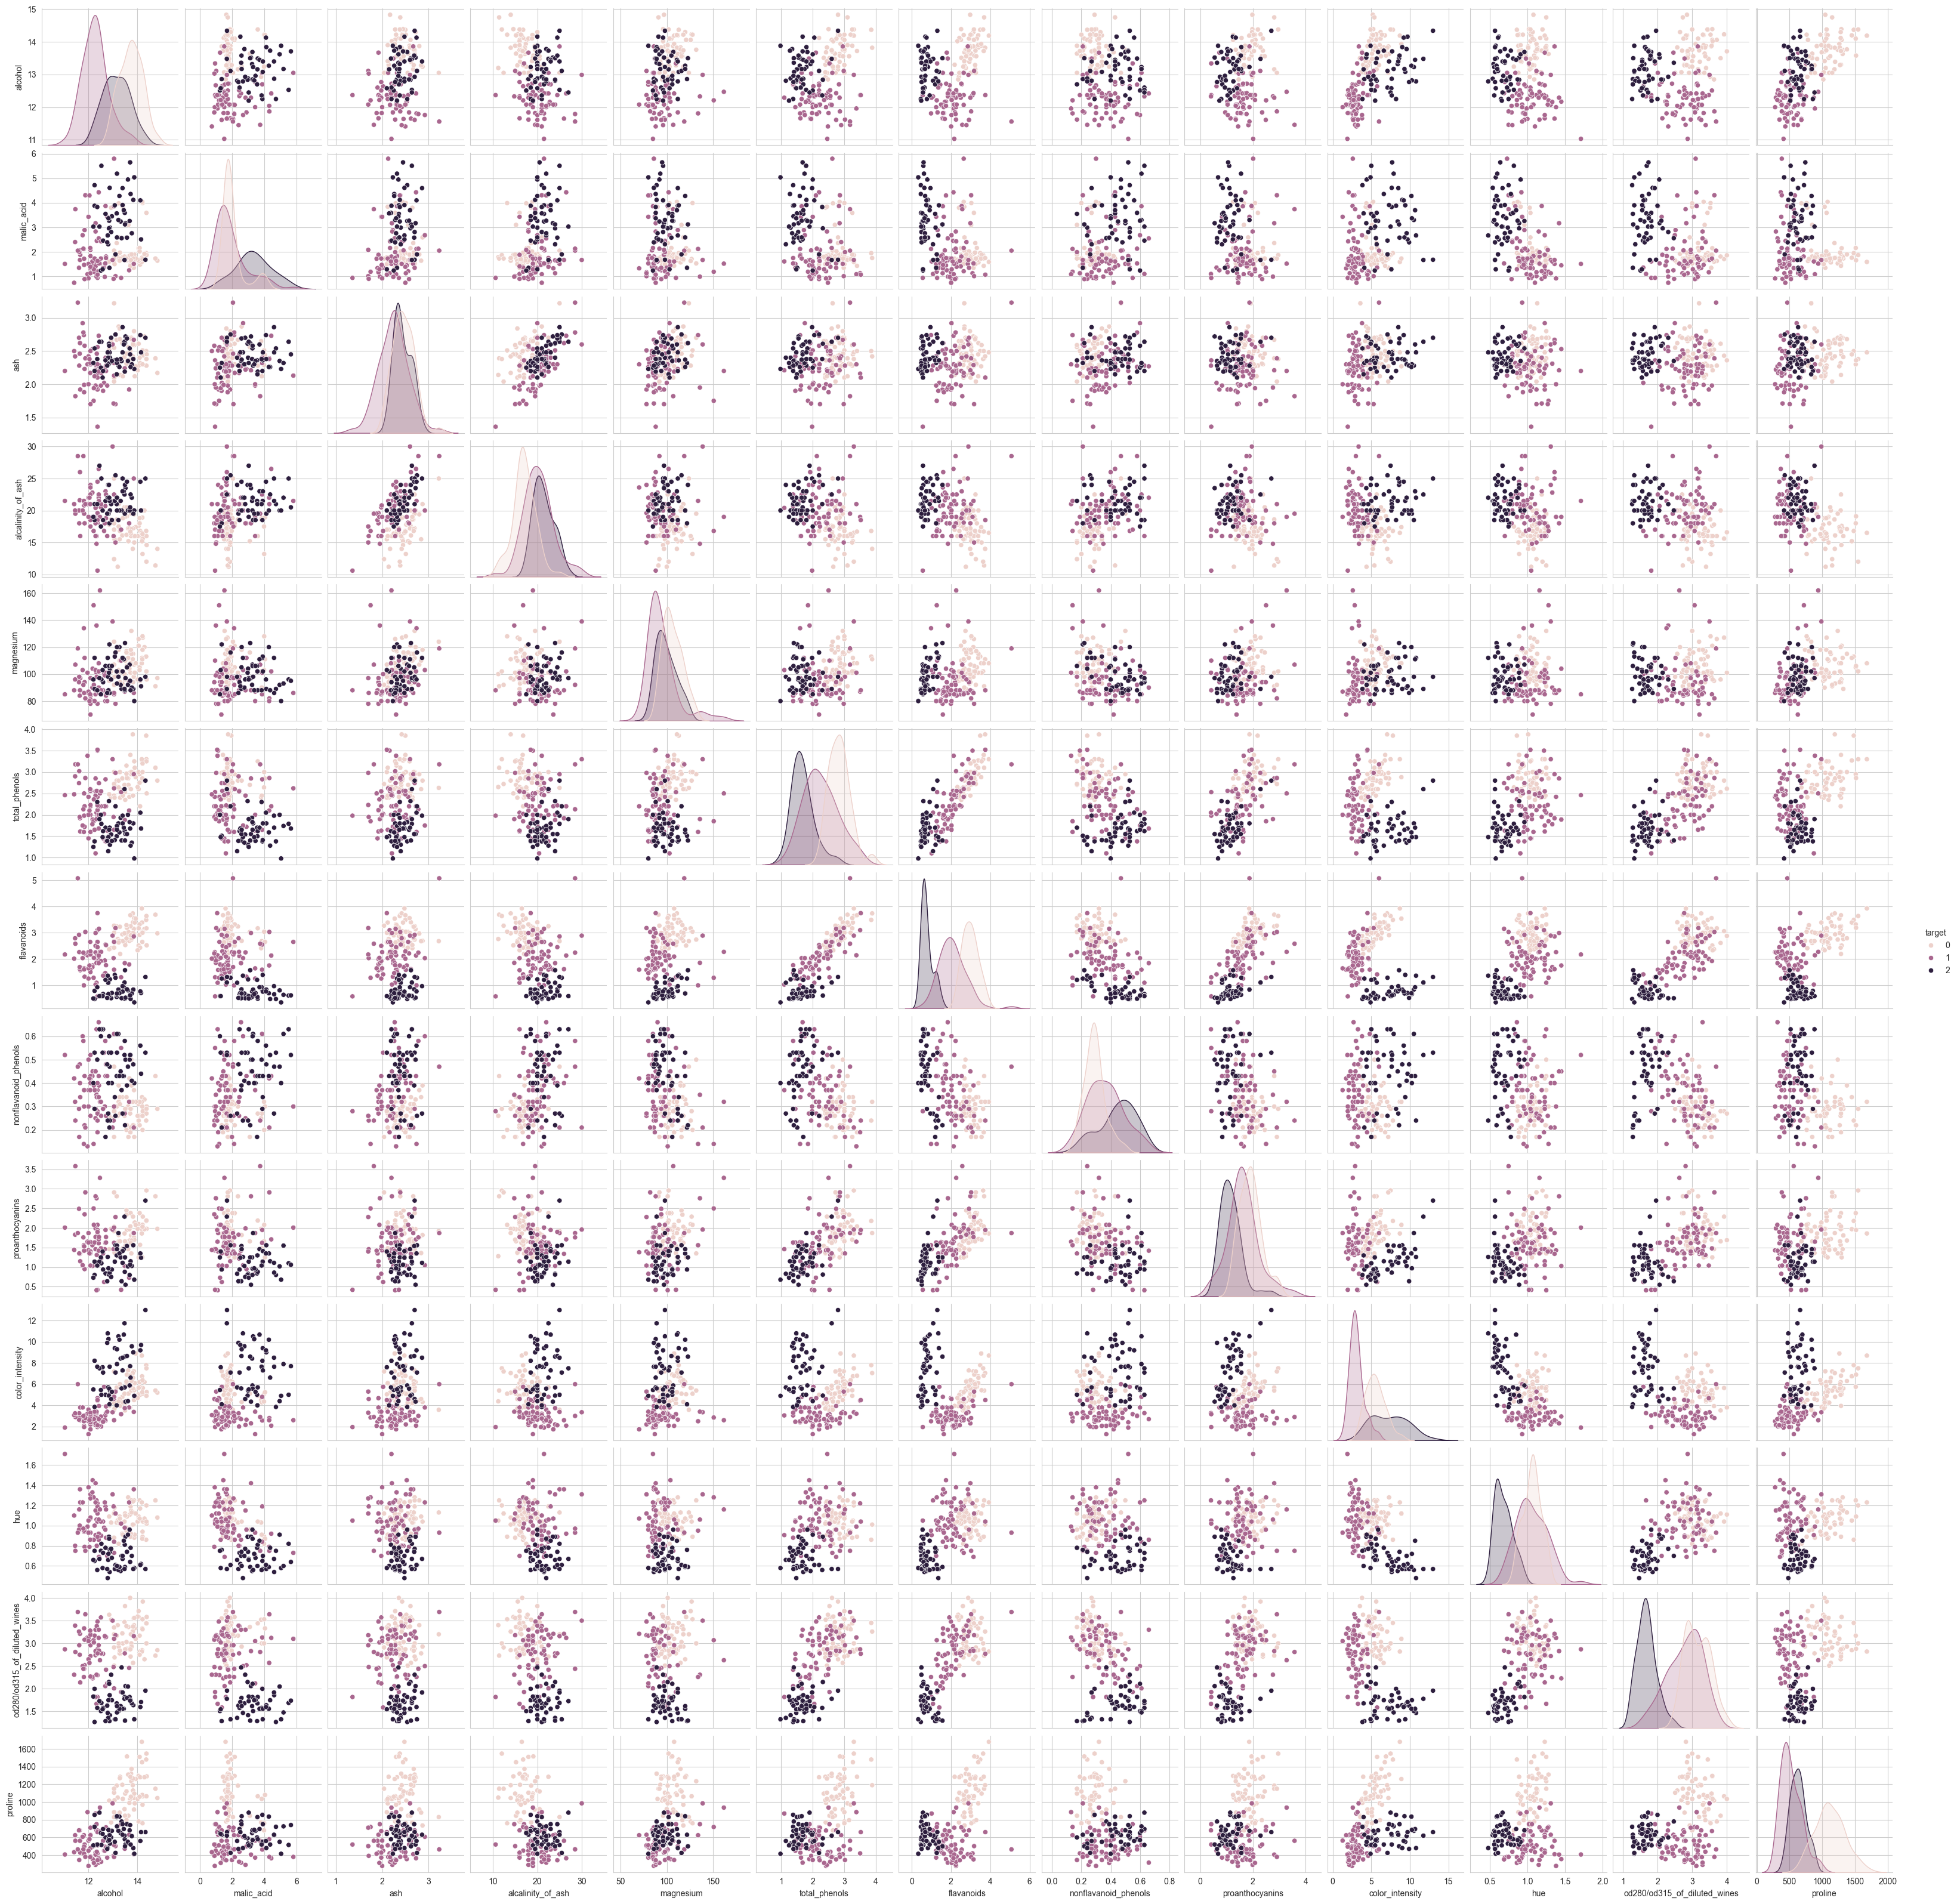

In [426]:
# Özellik Dağılımları
sns.pairplot(data, hue='target')
plt.show()


In [427]:
# Veri Setini Yükleme ve İnceleme
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

veri setindeki özellikler arasındaki ilişkileri ve sınıfların nasıl ayrıldığını görsel olarak incelemenizi sağlar.

In [428]:
# Veri Setini Bölme ve Ölçeklendirme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


veri setini eğitim ve test setlerine ayırarak, özellikleri ölçeklendirerek makine öğrenimi modellerini eğitmek için hazır hale getirir.

In [429]:
# KNN Algoritmasını Uygulama ve Sonuçlar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Results:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



 KNN sınıflandırıcı modelini eğitmek, test etmek ve sonuçları değerlendirmek için kullanılır.

In [430]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 14]])

sınıflandırıcı modelin performansını değerlendirmek için önemli bir araçtır.

Text(58.222222222222214, 0.5, 'Truth')

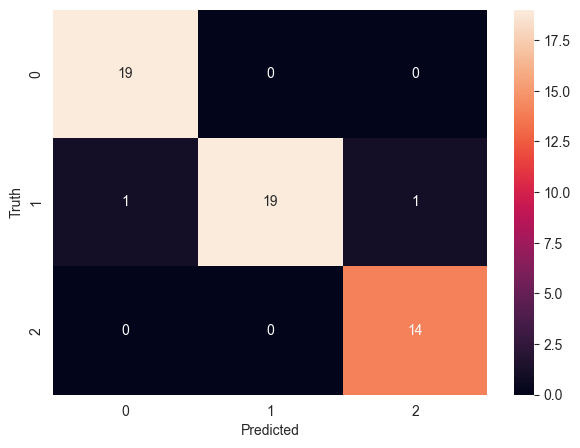

In [431]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

sınıflandırıcı modelin tahmin ettiği ve gerçekte ne olduğu hakkında bilgi sağlayan karışıklık matrisini görsel olarak gösterir.

In [432]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



sınıflandırıcı modelin performansını daha ayrıntılı olarak anlamak için kullanılır.

makine öğrenimi modellerine giriş verisi olarak kullanılmak üzere veri setini hazırlamak için yapılır.

In [433]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

kategorik verileri sayısal biçime dönüştürmek ve bu verileri makine öğrenimi algoritmalarına giriş olarak sağlamak için yaygın olarak kullanılan bir yöntemdir.

In [434]:
inputs['alcohol_n'] = le_company.fit_transform(inputs['alcohol'])
inputs['malic_acid_n'] = le_job.fit_transform(inputs['malic_acid'])
inputs['ash_n'] = le_degree.fit_transform(inputs['ash'])

In [435]:
inputs

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  alcohol_n  malic_acid_n  \
0                            3.92   1065.0       0        118            43   
1                            3.40   1050.0       0         65            49   
2                            3.17   1185.0       0         63            71   
3                            3.45   1480.0       0        121            59   
4                            2.93    735.0       0         67            81   
..                            ...      ...     ...        ...           ...   
173                          1.74    740.0       2         92           131   
174                          1.56    750.0       2         76           113   
175                          1.56    835.0       2         68           119   
176                          1.62    840.0       2         64            81   
177                          1.60    560.0       2        112           117   

     ash_n  
0       44  
1       18  
2       63  
3       49  
4       75  
..     ...  
173     46  
174     48  
175     29  
176     38  
177     69  

[178 rows x 17 columns]

In [436]:
inputs_n = inputs.drop(['alcohol','malic_acid','ash'],axis='columns')

In [437]:
inputs_n

alcalinity_of_ash  magnesium  total_phenols  flavanoids  \
0                 15.6      127.0           2.80        3.06   
1                 11.2      100.0           2.65        2.76   
2                 18.6      101.0           2.80        3.24   
3                 16.8      113.0           3.85        3.49   
4                 21.0      118.0           2.80        2.69   
..                 ...        ...            ...         ...   
173               20.5       95.0           1.68        0.61   
174               23.0      102.0           1.80        0.75   
175               20.0      120.0           1.59        0.69   
176               20.0      120.0           1.65        0.68   
177               24.5       96.0           2.05        0.76   

     nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0                    0.28             2.29             5.64  1.04   
1                    0.26             1.28             4.38  1.05   
2                    0.30             2.81             5.68  1.03   
3                    0.24             2.18             7.80  0.86   
4                    0.39             1.82             4.32  1.04   
..                    ...              ...              ...   ...   
173                  0.52             1.06             7.70  0.64   
174                  0.43             1.41             7.30  0.70   
175                  0.43             1.35            10.20  0.59   
176                  0.53             1.46             9.30  0.60   
177                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  alcohol_n  malic_acid_n  \
0                            3.92   1065.0       0        118            43   
1                            3.40   1050.0       0         65            49   
2                            3.17   1185.0       0         63            71   
3                            3.45   1480.0       0        121            59   
4                            2.93    735.0       0         67            81   
..                            ...      ...     ...        ...           ...   
173                          1.74    740.0       2         92           131   
174                          1.56    750.0       2         76           113   
175                          1.56    835.0       2         68           119   
176                          1.62    840.0       2         64            81   
177                          1.60    560.0       2        112           117   

     ash_n  
0       44  
1       18  
2       63  
3       49  
4       75  
..     ...  
173     46  
174     48  
175     29  
176     38  
177     69  

[178 rows x 14 columns]

In [438]:
target

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: wine_name, Length: 178, dtype: object

In [439]:
# Karar Ağacı Algoritmasını Uygulama ve Sonuçlar
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
model = tree.DecisionTreeClassifier()


print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



veri içindeki özelliklerin değerlerine göre bir dizi karar kuralı oluşturur ve yeni verileri bu kurallarla sınıflandırır. Bu kod bloğu, bu modelin test verileri üzerinde nasıl performans gösterdiğini değerlendirmek için kullanılır.

In [440]:
model.fit(inputs_n, target)


DecisionTreeClassifier()

In [441]:
model.score(inputs_n,target)


1.0

### KNN Algorithm Results
- Accuracy: 96%
- For Class 0: True positives (TP): 19, False negatives (FN): 0
- For Class 1: True positives (TP): 19, False negatives (FN): 1
- For Class 2: True positives (TP): 14, False negatives (FN): 0

### Decision Tree Algorithm Results
- Accuracy: 96%
- For Class 0: True positives (TP): 18, False negatives (FN): 0
- For Class 1: True positives (TP): 21, False negatives (FN): 0
- For Class 2: True positives (TP): 13, False negatives (FN): 1